<h1>4.2 分类模型常用评价指标<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#4.2.1-混淆矩阵" data-toc-modified-id="4.2.1-混淆矩阵-1">4.2.1 混淆矩阵</a></span></li><li><span><a href="#4.2.2-ROC曲线" data-toc-modified-id="4.2.2-ROC曲线-2">4.2.2 ROC曲线</a></span></li><li><span><a href="#4.2.3-AUC" data-toc-modified-id="4.2.3-AUC-3">4.2.3 AUC</a></span></li><li><span><a href="#4.2.4-KS指标" data-toc-modified-id="4.2.4-KS指标-4">4.2.4 KS指标</a></span></li><li><span><a href="#4.2.5-Lift提升度" data-toc-modified-id="4.2.5-Lift提升度-5">4.2.5 Lift提升度</a></span></li></ul></div>

In [1]:
import numpy as np 
import pandas as pd  
from  sklearn.metrics import confusion_matrix,roc_curve
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [2]:
iris = load_iris()

In [3]:
df = pd.DataFrame(iris.data[0:40],columns=['X1','X2','X3','X4']) 
df1 = pd.DataFrame(iris.data[50:90],columns=['X1','X2','X3','X4']) 
df2 = pd.DataFrame(iris.data[100:120],columns=['X1','X2','X3','X4']) 
df = pd.concat([df,df1,df2],axis=0)

In [4]:
df['label'] = [0] * 50 + [1] * 50 
X= df[['X1','X2']]
y = df['label']
model = LogisticRegression()
model.fit(X,y)
model2 = RandomForestClassifier(random_state=12)
model2.fit(X,y)

RandomForestClassifier(random_state=12)

#  4.2.1 混淆矩阵

In [5]:
predictions = model.predict_proba(X)[:,1]
predictions = model.predict(X)
confusion_matrix(predictions,df['label'])

array([[42,  6],
       [ 8, 44]], dtype=int64)

In [6]:
predictions2 = model2.predict_proba(X)[:,1]
predictions2 = model2.predict(X)
confusion_matrix(predictions2,df['label'])

array([[49,  1],
       [ 1, 49]], dtype=int64)

In [7]:
predictions = model.predict_proba(X)[:,1]
df['prediction'] = predictions
predictions2 = model2.predict_proba(X)[:,1]
df['prediction2'] = predictions2

In [8]:
df['pred'] = df['prediction'] >= 0.2
tb = confusion_matrix(df['label'],df['pred'])
print(tb)
# TP	FP
# FN	TN
# FPR = FP / (FP + TN)
# TPR = TP / (TP + FN)
FPR = tb[0,1]/(tb[0,1] + tb[0,0])
print('FPR:',FPR)
TPR =  tb[1,1]/(tb[1,0] + tb[1,1]) 
print('TPR:',TPR)

[[39 11]
 [ 0 50]]
FPR: 0.22
TPR: 1.0


# 4.2.2 ROC曲线

# 4.2.3 AUC

In [9]:
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
###计算roc和auc
def auc_curve(y,prob):
#y真实prob预测
    fpr,tpr,threshold = roc_curve(y,prob) ###计算真阳性率和假阳性率
    roc_auc = auc(fpr,tpr) ###计算auc的值

    plt.figure()
    lw = 2
    plt.figure(figsize=(10,10))
    plt.plot(fpr, tpr, color='darkorange',linestyle='-.',
             lw=lw,label='ROC curve (area = %0.3f)' % roc_auc) ###假正率为横坐标，真正率为纵坐标做曲线
    plt.plot([0, 1], [0, 1], color='blue', lw=lw, linestyle='--')
    plt.xlim([-0.01, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('AUC')
    plt.legend(loc="lower right")
    print('ROC curve (area = %0.3f)' % roc_auc)

ROC curve (area = 0.914)


<Figure size 432x288 with 0 Axes>

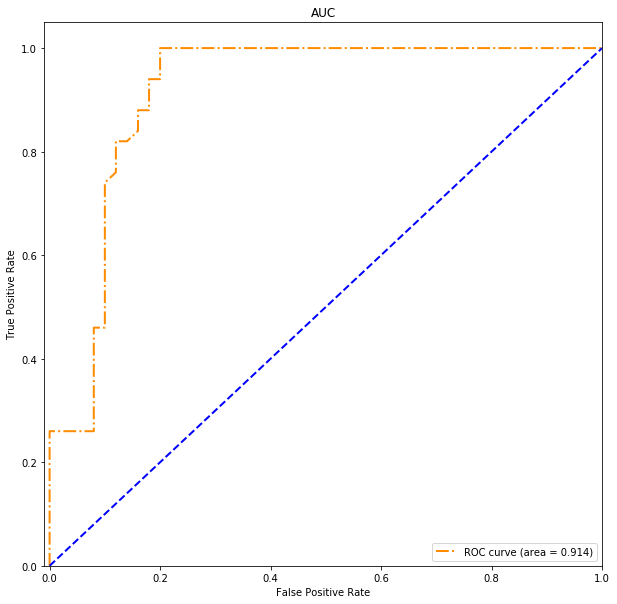

In [10]:
auc_curve(df['label'],df['prediction'])

In [11]:
def auc_curve2(y,prob,prob2):
#y真实prob预测
    fpr,tpr,threshold = roc_curve(y,prob) ###计算真阳性率和假阳性率
    roc_auc = auc(fpr,tpr) ###计算auc的值
    fpr2,tpr2,threshold2 = roc_curve(y,prob2) ###计算真阳性率和假阳性率
    roc_auc2 = auc(fpr2,tpr2) ###计算auc的值 
    
    plt.figure()
    lw = 2
    plt.figure(figsize=(10,10))
    plt.plot(fpr, tpr, color='darkorange',linestyle='-.',
             lw=lw,label='ROC curve (area = %0.3f)' % roc_auc) ###假正率为横坐标，真正率为纵坐标做曲线
    plt.plot(fpr2, tpr2, color='red',linestyle='dotted',
             lw=lw,label='ROC curve (area = %0.3f)' % roc_auc2) ###假正率为横坐标，真正率为纵坐标做曲线

    plt.plot([0, 1], [0, 1], color='blue', lw=lw, linestyle='--')
    plt.xlim([-0.01, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('AUC')
    plt.legend(loc="lower right")
    print('ROC curve (area = %0.3f)' % roc_auc)
    plt.text(0,1.01,'model_B')
    plt.text(0.1,0.9,'model_A')
    plt.show()


ROC curve (area = 0.914)


<Figure size 432x288 with 0 Axes>

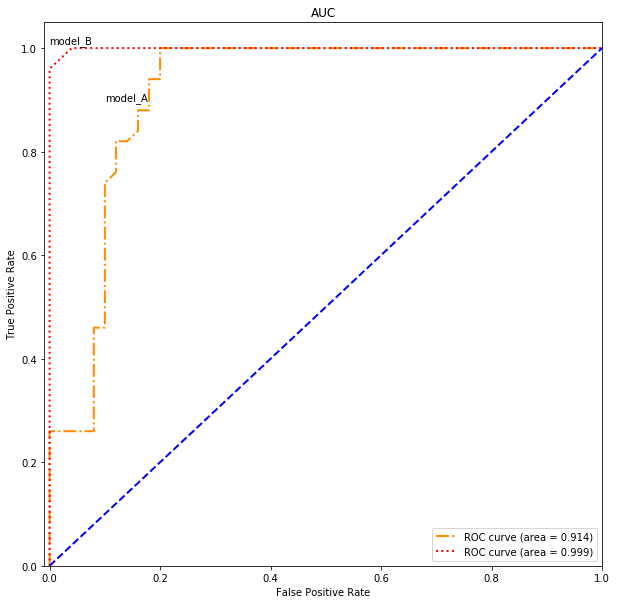

In [12]:
auc_curve2(df['label'],df['prediction'],df['prediction2'])
# auc_curve(df['label'],df['prediction2'])

# 4.2.4 KS指标

ks_value is 0.78 at pop = 0.61


C:\Users\ASUS\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\ASUS\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


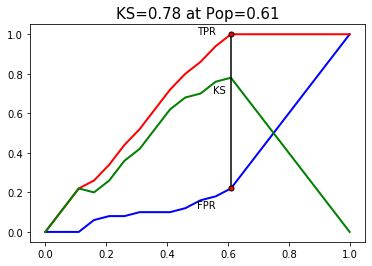

In [13]:
def PlotKS(preds, labels, n, asc):
    pred = preds  # 预测值
    bad = labels  # 取1为bad, 0为good
    ksds = pd.DataFrame({'bad': bad, 'pred': pred})
    ksds['good'] = 1 - ksds.bad

    if asc == 1:
        ksds1 = ksds.sort_values(by=['pred', 'bad'], ascending=[True, True])
    elif asc == 0:
        ksds1 = ksds.sort_values(by=['pred', 'bad'], ascending=[False, True])
    ksds1.index = range(len(ksds1.pred))
    ksds1['cumsum_good1'] = 1.0*ksds1.good.cumsum()/sum(ksds1.good)
    ksds1['cumsum_bad1'] = 1.0*ksds1.bad.cumsum()/sum(ksds1.bad)

    if asc == 1:
        ksds2 = ksds.sort_values(by=['pred', 'bad'], ascending=[True, False])
    elif asc == 0:
        ksds2 = ksds.sort_values(by=['pred', 'bad'], ascending=[False, False])
    ksds2.index = range(len(ksds2.pred))
    ksds2['cumsum_good2'] = 1.0*ksds2.good.cumsum()/sum(ksds2.good)
    ksds2['cumsum_bad2'] = 1.0*ksds2.bad.cumsum()/sum(ksds2.bad)

    # ksds1 ksds2 -> average
    ksds = ksds1[['cumsum_good1', 'cumsum_bad1']]
    ksds['cumsum_good2'] = ksds2['cumsum_good2']
    ksds['cumsum_bad2'] = ksds2['cumsum_bad2']
    ksds['cumsum_good'] = (ksds['cumsum_good1'] + ksds['cumsum_good2'])/2
    ksds['cumsum_bad'] = (ksds['cumsum_bad1'] + ksds['cumsum_bad2'])/2

    # ks
    ksds['ks'] = ksds['cumsum_bad'] - ksds['cumsum_good']
    ksds['tile0'] = range(1, len(ksds.ks) + 1)
    ksds['tile'] = 1.0*ksds['tile0']/len(ksds['tile0'])

    qe = list(np.arange(0, 1, 1.0/n))
    qe.append(1)
    qe = qe[1:]

    ks_index = pd.Series(ksds.index)
    ks_index = ks_index.quantile(q=qe)
    ks_index = np.ceil(ks_index).astype(int)
    ks_index = list(ks_index)

    ksds = ksds.loc[ks_index]
    ksds = ksds[['tile', 'cumsum_good', 'cumsum_bad', 'ks']]
    ksds0 = np.array([[0, 0, 0, 0]])
    ksds = np.concatenate([ksds0, ksds], axis=0)
    ksds = pd.DataFrame(
        ksds, columns=['tile', 'cumsum_good', 'cumsum_bad', 'ks'])

    ks_value = ksds.ks.max()
    ks_pop = ksds.tile[ksds.ks.idxmax()]
    print('ks_value is ' + str(np.round(ks_value, 4)) +
          ' at pop = ' + str(np.round(ks_pop, 4)))
    df_ks_max = ksds[ksds['ks'] ==ks_value ]
    x_point = [df_ks_max['tile'].values[0], df_ks_max['tile'].values[0]]
    y_point = [df_ks_max['cumsum_bad'].values[0], df_ks_max['cumsum_good'].values[0]]
    # chart
    plt.plot(ksds.tile, ksds.cumsum_good, label='TPR',
             color='blue', linestyle='-', linewidth=2)
    
    plt.plot(ksds.tile, ksds.cumsum_bad, label='FPR',
             color='red', linestyle='-', linewidth=2)

    plt.plot(ksds.tile, ksds.ks, label='ks',
             color='green', linestyle='-', linewidth=2)
    plt.plot(x_point, y_point, label='ks - {:.2f}'.format(
        ks_value), color='black', marker='o', markerfacecolor='r', markersize=5)
    plt.text(0.5,1,'TPR')
    plt.text(0.55,0.7,'KS')
    plt.text(0.5,0.12,'FPR')
    plt.title('KS=%s ' % np.round(ks_value, 4) +
              'at Pop=%s' % np.round(ks_pop, 4), fontsize=15)
    plt.show()

    return ksds
df_tb = PlotKS(df['prediction'],df['label'],n= 20,asc = 0)

C:\Users\ASUS\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\ASUS\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


ks_value is 0.78 at pop = 0.61


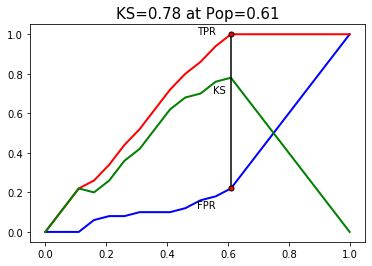

In [14]:
df_tb = PlotKS(df['prediction'],df['label'],n= 20,asc = 0)


In [15]:
df_tb.head()

,tile,cumsum_good,cumsum_bad,ks
0,0.00,0.00,0.00,0.00
1,0.06,0.00,0.12,0.12
2,0.11,0.00,0.22,0.22
3,0.16,0.06,0.26,0.20
4,0.21,0.08,0.34,0.26


# 4.2.5 Lift提升度

In [16]:
def plotLift(pred, bad, n, asc):
    lftds = pd.DataFrame({'bad': bad, 'pred': pred})
    lftds['good'] = 1 - lftds.bad

    if asc == 1:
        lftds1 = lftds.sort_values(by=['pred', 'bad'], ascending=[True, True])
    elif asc == 0:
        lftds1 = lftds.sort_values(by=['pred', 'bad'], ascending=[False, True])
    lftds1.index = range(len(lftds1.pred))
    lftds1['cumsum_good'] = 1.0*lftds1.good.cumsum()/sum(lftds1.good)
    lftds1['cumsum_bad'] = 1.0*lftds1.bad.cumsum()/sum(lftds1.bad)
    


    lftds1.index = range(len(lftds1.pred))

    qe = list(np.arange(0, 1, 1.0 / n))
    qe.append(1)
    qe = qe[1:]

    lft_index = pd.Series(lftds1.index)
    lft_index = lft_index.quantile(q=qe)
    lft_index = np.ceil(lft_index).astype(int)
    lft_index = list(lft_index)

    lift_df = lftds1.loc[lft_index]
    lift_df['bad_random']  = 1/n
    lift_df['cumsum_bad_random'] = lift_df['bad_random'].cumsum()
    lift_df['Lift'] = lift_df['cumsum_bad']/lift_df['cumsum_bad_random']

    lift_no = range(1, len(lift_df['Lift']) + 1)

    plt.plot(lift_no, lift_df['Lift'], 'bo-', linewidth=2)
    plt.axhline(1, color='gray', linestyle='--')
    plt.title('Lift', fontsize=15)

    lift_df['rank'] = list(range(n))
    
    return lift_df[['rank','cumsum_good', 'cumsum_bad','cumsum_bad_random', 'Lift']]

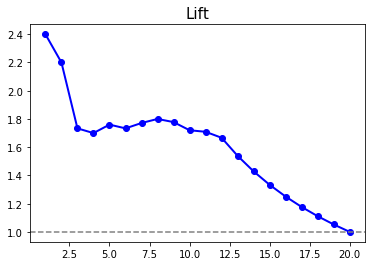

In [17]:
df_tb = plotLift(df['prediction'],df['label'],n= 20,asc = 0)
plt.show()

In [18]:
df_tb.head()

,rank,cumsum_good,cumsum_bad,cumsum_bad_random,Lift
5,0,0.00,0.12,0.05,2.400000
10,1,0.00,0.22,0.10,2.200000
15,2,0.06,0.26,0.15,1.733333
20,3,0.08,0.34,0.20,1.700000
25,4,0.08,0.44,0.25,1.760000
